# k-nearest neighbor algorithm

https://towardsdatascience.com/getting-acquainted-with-k-nearest-neighbors-ba0a9ecf354f

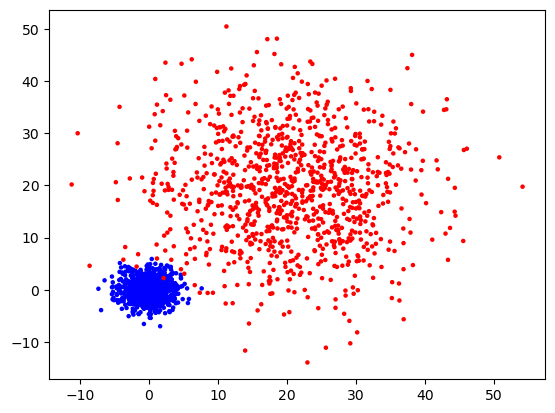

In [145]:
import numpy as np
import pandas as pd
N=1000

df1 = 2*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2 = 20+10*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])

Data=np.concatenate(( df1, df2), axis=0)

Data[:,2]=1
Data[0:N,2]=0

import matplotlib.pyplot as plt

s='b'*N+'r'*N
plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))


Please, write(without using any additional library) a function 
```nearest(x,k,Data)```
which return a predicted class for the new data piont ```x``` based on ```k```-nearest neighbor algorithm for dataset Data.

# Task 1

In [109]:
def distance(x, y):
    return abs(y[0] - x[0]) + abs(y[1] - x[1])

import heapq

def nearest(x: list[float], k: int, Data: np.ndarray):
    nearest_elements = []
    heapq.heapify(nearest_elements)

    for element in Data:
        heapq.heappush(nearest_elements, [distance(x, element), element[2]])

    blue = 0

    for _ in range(k):
        if heapq.heappop(nearest_elements)[1] == 0. :
            blue+=1

    return blue <= k/2


print (nearest([1,1], 1001, Data))

False


# Task 2

Use the function meshgrid to plot prediction for each piont. See the result below. Please decide which k is the best, or at least 'good enough'.

In [130]:
x_min = Data[:,0].min()
x_max = Data[:,0].max()
y_min = Data[:,1].min()
y_max = Data[:,1].max()

[x,y] = np.meshgrid(np.linspace(x_min-1, x_max+1, 100),np.linspace(y_min-1, y_max+1, 100), indexing='xy')

grid_points = np.c_[x.ravel() , y.ravel()]


In [131]:
colour_grid = np.array([nearest(point, 5, Data) for point in grid_points])

colour_mesh = colour_grid.reshape(x.shape)

colour_mesh

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

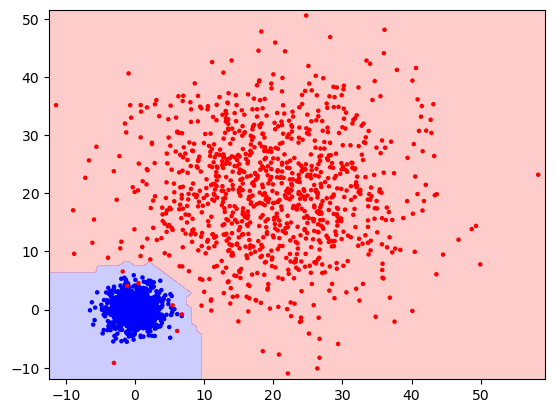

In [133]:
plt.contourf(x, y ,colour_mesh, alpha=0.2, colors=['b', 'r'])

plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))

plt.show()

# Task 3

Read about ```train_test_split``` function (```sklearn.model_selection```). Split dataset into two parts: train and test set.
Check on test set how many times your function(trained on train set) made a mistake.

Do the same by using ```confusion_matrix``` (```sklearn.metrics```).

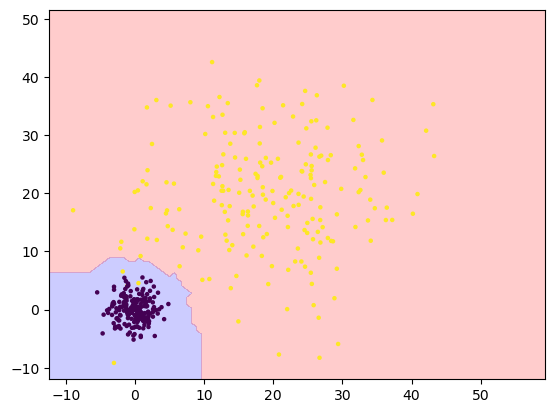

array([[193,   4],
       [  0, 203]])

In [129]:
import sklearn.metrics
import sklearn.model_selection

[train_set, test_set] = sklearn.model_selection.train_test_split(Data, test_size=.2, random_state=75645)

mistake_count = 0

for point in test_set:
    if nearest(point[:2], 5, train_set) != point[2]:
        mistake_count+=1

mistake_count

colour_grid = np.array([nearest(point, 5, train_set) for point in grid_points])
colour_mesh = colour_grid.reshape(x.shape)

plt.contourf(x, y ,colour_mesh, alpha=0.2, colors=['b', 'r'])

plt.scatter(test_set[:,0],test_set[:,1], s=5,alpha=1,c=test_set[:,2])
plt.show()

predictions = [nearest(point[:2], 5, train_set) for point in test_set]
real_values = [point[2] for point in test_set]

sklearn.metrics.confusion_matrix(predictions,real_values)


# Task 4

Repeat tasks 2 and 3, by using ```KNeighborsClassifier``` function (sklearn). What other parameters do we have?

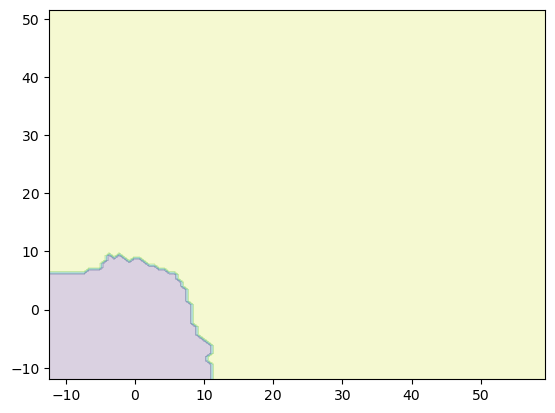

array([0., 0., 0., ..., 1., 1., 1.])

In [176]:
import sklearn
import sklearn.neighbors 

classifier = sklearn.neighbors.KNeighborsClassifier(5)
classifier.fit(train_set[:,:2], train_set[:,2])
predictions = classifier.predict(grid_points)

colour_mesh = predictions.reshape(x.shape)

plt.contourf(x, y ,colour_mesh, alpha=0.2)
plt.show()

predictions